In [3]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
print(spaceship.shape)
print(spaceship.info())

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [7]:
spaceship["Cabin_deck"] = spaceship["Cabin"].str[0]

In [9]:
spaceship.drop(["PassengerId", "Name", "Cabin"], axis=1, inplace=True)

In [11]:
spaceship = spaceship.dropna()

In [12]:
spaceship

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E


In [13]:
print(spaceship.shape)
print(spaceship.info())

(6764, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 6764 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6764 non-null   object 
 1   CryoSleep     6764 non-null   object 
 2   Destination   6764 non-null   object 
 3   Age           6764 non-null   float64
 4   VIP           6764 non-null   object 
 5   RoomService   6764 non-null   float64
 6   FoodCourt     6764 non-null   float64
 7   ShoppingMall  6764 non-null   float64
 8   Spa           6764 non-null   float64
 9   VRDeck        6764 non-null   float64
 10  Transported   6764 non-null   bool   
 11  Cabin_deck    6764 non-null   object 
dtypes: bool(1), float64(6), object(5)
memory usage: 640.7+ KB
None


In [15]:
features = spaceship.drop("Transported", axis = 1)
target = spaceship["Transported"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [20]:
category_colms = X_train.select_dtypes(include="object").columns.tolist()

X_train_encoded = pd.get_dummies(X_train, columns=category_colms, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=category_colms, drop_first=True)

In [21]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train_encoded), columns=X_train_encoded.columns)
X_test_norm  = pd.DataFrame(scaler.transform(X_test_encoded), columns=X_test_encoded.columns)

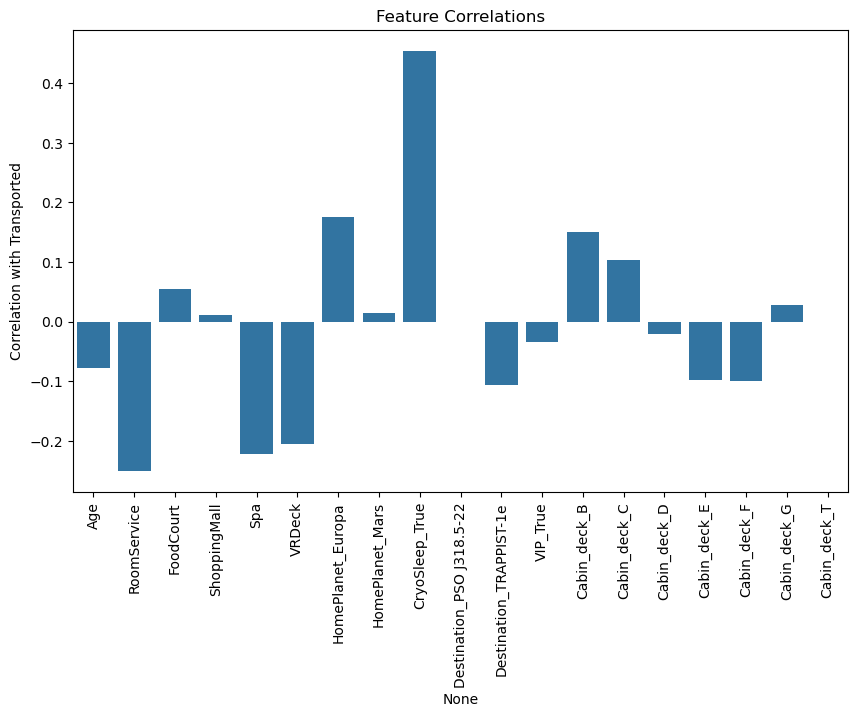

Selected features: ['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'HomePlanet_Europa', 'CryoSleep_True', 'Destination_TRAPPIST-1e', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_E', 'Cabin_deck_F']


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train_corr = X_train_norm.copy()
X_train_corr["Transported"] = y_train.reset_index(drop=True)

corr_matrix = X_train_corr.corr()

plt.figure(figsize=(10,6))
sns.barplot(x=corr_matrix.index[:-1], y=corr_matrix["Transported"][:-1])
plt.xticks(rotation=90)
plt.ylabel("Correlation with Transported")
plt.title("Feature Correlations")
plt.show()

low_corr_features = corr_matrix["Transported"].abs()[corr_matrix["Transported"].abs() < 0.05].index.tolist()
X_train_selected = X_train_norm.drop(columns=low_corr_features)
X_test_selected  = X_test_norm.drop(columns=low_corr_features)

print("Selected features:", X_train_selected.columns.tolist())

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error

In [32]:
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=8),  # <-- updated parameter name
    n_estimators=100,
    max_samples=2000,
    bootstrap=True,
    random_state=42,
    n_jobs=-1)

In [33]:
bagging_clf.fit(X_train_selected, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                  max_samples=2000, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [34]:
y_pred_test  = bagging_clf.predict(X_test_selected)
y_pred_train = bagging_clf.predict(X_train_selected)

In [35]:
def print_metrics(y_true, y_pred, dataset="Test"):
    print(f"--- {dataset} DATA ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("----------------------------")

print_metrics(y_test, y_pred_test, "Test")
print_metrics(y_train, y_pred_train, "Train")

--- Test DATA ---
Accuracy: 0.8019216555801921
F1 Score: 0.8138888888888889
Confusion Matrix:
 [[499 171]
 [ 97 586]]
----------------------------
--- Train DATA ---
Accuracy: 0.8102014415080392
F1 Score: 0.818519172998763
Confusion Matrix:
 [[2068  625]
 [ 402 2316]]
----------------------------


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    max_depth=None,
    random_state=0,
    n_jobs=-1)

In [39]:
rf_clf.fit(X_train_selected, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [40]:
y_pred_test  = rf_clf.predict(X_test_selected)
y_pred_train = rf_clf.predict(X_train_selected)

In [41]:
def print_classification_metrics(y_true, y_pred, dataset="Test"):
    print(f"--- {dataset} DATA ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("----------------------------")

print_classification_metrics(y_test, y_pred_test, "Test")
print_classification_metrics(y_train, y_pred_train, "Train")

--- Test DATA ---
Accuracy: 0.802660753880266
F1 Score: 0.8058181818181818
Confusion Matrix:
 [[532 138]
 [129 554]]
----------------------------
--- Train DATA ---
Accuracy: 0.9369802254666421
F1 Score: 0.93965669792957
Confusion Matrix:
 [[2415  278]
 [  63 2655]]
----------------------------


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gradient_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=3,
    random_state=0)

In [44]:
gradient_clf.fit(X_train_selected, y_train)

GradientBoostingClassifier(learning_rate=0.2, random_state=0)

In [45]:
y_pred_test  = gradient_clf.predict(X_test_selected)
y_pred_train = gradient_clf.predict(X_train_selected)

In [46]:
def print_classification_metrics(y_true, y_pred, dataset="Test"):
    print(f"--- {dataset} DATA ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("----------------------------")

print_classification_metrics(y_test, y_pred_test, "Test")
print_classification_metrics(y_train, y_pred_train, "Train")

--- Test DATA ---
Accuracy: 0.8085735402808574
F1 Score: 0.8195121951219512
Confusion Matrix:
 [[506 164]
 [ 95 588]]
----------------------------
--- Train DATA ---
Accuracy: 0.8229532433930882
F1 Score: 0.8309809456598447
Confusion Matrix:
 [[2098  595]
 [ 363 2355]]
----------------------------


In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
adaptive_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.1,
    random_state=0)

In [49]:
adaptive_clf.fit(X_train_selected, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [51]:
y_pred_test  = adaptive_clf.predict(X_test_selected)
y_pred_train = adaptive_clf.predict(X_train_selected)

In [52]:
def print_classification_metrics(y_true, y_pred, dataset="Test"):
    print(f"--- {dataset} DATA ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("----------------------------")

print_classification_metrics(y_test, y_pred_test, "Test")
print_classification_metrics(y_train, y_pred_train, "Train")

--- Test DATA ---
Accuracy: 0.7583148558758315
F1 Score: 0.7308641975308642
Confusion Matrix:
 [[582  88]
 [239 444]]
----------------------------
--- Train DATA ---
Accuracy: 0.7399741267787839
F1 Score: 0.7059561128526646
Confusion Matrix:
 [[2315  378]
 [1029 1689]]
----------------------------


In [53]:
### bagging or gradient (probably gradient) is the best option as they have a balanced performance unlike rf
### adaptive has too low scores compared to the others to be considered